# Exploring NASA NEX-GDDP-CMIP6 Data via OpenVisus + Intake

This notebook demonstrates how to:
- Load climate data (e.g., temperature, precipitation) from NASA NEX-GDDP-CMIP6
- Subset by time, region (lat/lon), and resolution (quality)
- Visualize the result using `xarray` and `matplotlib`

The data is accessed via a custom `Intake` catalog that wraps `OpenVisus`.

Developed by `Aashish Panta`, `Kyo Lee` and `Valerio Pascucci` from University of Utah and NASA JPL

### Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import OpenVisus as ov
import xarray as xr
import intake

### Open the catalog and set the variables

In [ ]:
cat = intake.open_catalog("cmip6_catalog.yml")
ds = cat.nex_gddp_cmip6(model="ACCESS-CM2", 
                        variable="tas", 
                        scenario="ssp245", 
                        timestamp="2015-10-15",
                        quality=0,
                        # lat_range=(0, 40),
                        # lon_range=(0, 120)
                        )

ds

nex_gddp_cmip6:
  args:
    model: ACCESS-CM2
    quality: 0
    scenario: ssp245
    timestamp: '2015-10-15'
    variable: tas
  description: Custom IDX-backed NEX-GDDP-CMIP6 source
  driver: loader.NexGDDPCatalog
  metadata:
    catalog_dir: /Users/aashishp/Research/Github/cmip6-intake-idx/


### Reading intake as xarray

In [12]:
xr_ds=ds.read()
xr_ds

[[0, 0], [1440, 600]]


<xarray.DataArray (lat: 600, lon: 1440)> Size: 3MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(600, 1440), dtype=float32)
Coordinates:
  * lat      (lat) float64 5kB -59.88 -59.63 -59.38 -59.13 ... 89.25 89.5 89.75
  * lon      (lon) float64 12kB 0.125 0.3749 0.6248 0.8747 ... 359.3 359.5 359.8

### Plot using default xarray

[[0, 0], [1440, 600]]


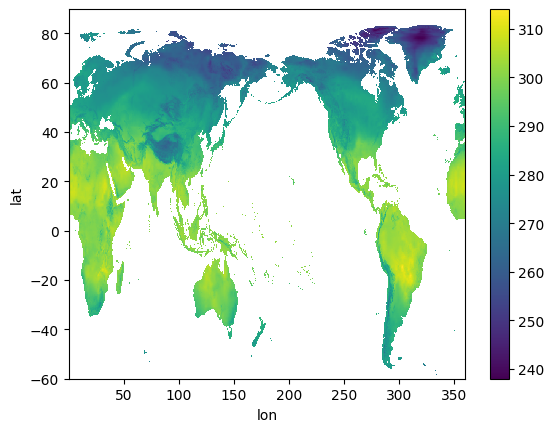

In [13]:
ds.read().plot()